In [1]:
import vipy
from keynet.system import Keynet

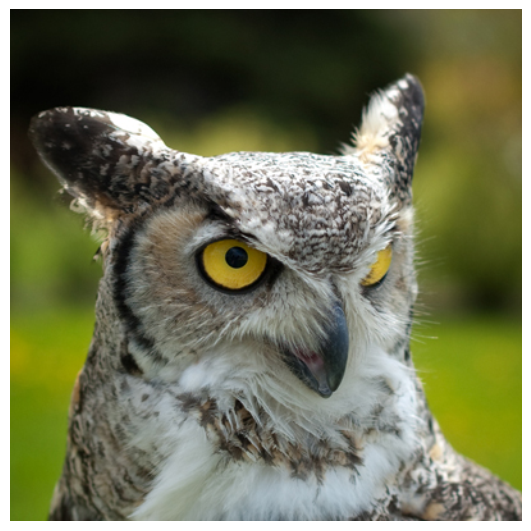

In [2]:
im_source = vipy.calibration.testimage().show()

In [3]:
(sensor, model) = Keynet(inshape=(3,224,224), 
                         net=None,
                         global_geometric='hierarchical_permutation', hierarchical_blockshape=(2,2), hierarchical_permute_at_level=(0,1,2),
                         global_photometric='identity', 
                         local_geometric='identity', 
                         local_photometric='identity',
                         memoryorder='channel')

torch.Size([1, 3, 224, 224])


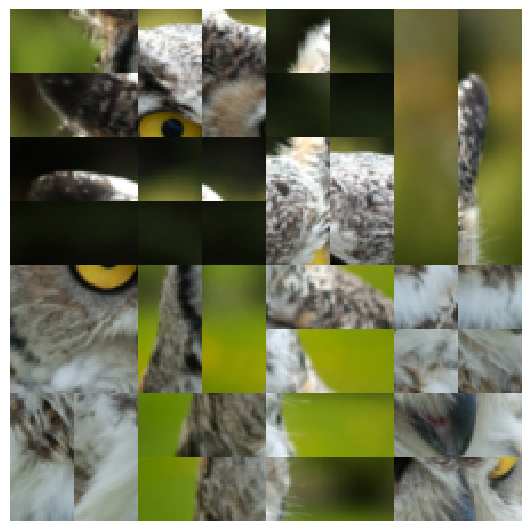

<vipy.image: height=512, width=512, color=rgb>

In [4]:
# Block permutation keynet:  This is not privacy preserving by itself
sensor.fromimage(im_source).encrypt().toimage().mindim(512, interp='nearest').show()    

In [8]:
# Stochastic Keynet
(sensor, model) = Keynet(inshape=(3,224,224), net=None, blocksize=56,
                         global_geometric='hierarchical_permutation', hierarchical_blockshape=(2,2), hierarchical_permute_at_level=(0,1,2),
                         global_photometric='identity', 
                         local_geometric='givens_orthogonal', alpha=56,
                         local_photometric='uniform_random_affine', beta=1.0, gamma=1000.0,
                         memoryorder='block')  

/Users/jba3139/dev/vipy/vipy/image.py:400: UserWarning: Coercing generic colorspace=float to colorspace=rgb for image transformation
  warnings.warn('Coercing generic colorspace=float to colorspace=rgb for image transformation')
/Users/jba3139/dev/vipy/vipy/image.py:753: UserWarning: Float image will be rescaled with self.mat2gray() into the range float32 [0,1]
  warnings.warn('Float image will be rescaled with self.mat2gray() into the range float32 [0,1]')


torch.Size([1, 3, 224, 224])


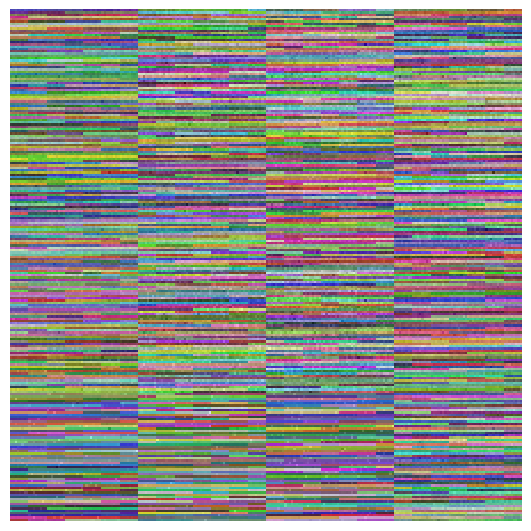

<vipy.image: height=512, width=512, color=rgb>

In [10]:
# Show the keyed image
keyed = sensor.fromimage(im_source).encrypt()
keyed.toimage().mindim(512, interp='nearest').show()    

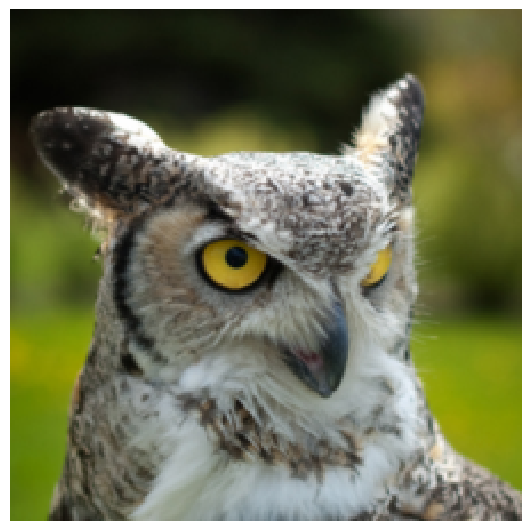

<vipy.image: height=512, width=512, color=rgb>

In [7]:
# Recover the original image
keyed.decrypt().toimage().mindim(512, interp='nearest').show()    